In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

## 1. Fonction de densité (PDF)

La fonction de densité de la loi normale est donnée par :

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

où :
- $\mu$ est la moyenne
- $\sigma$ est l'écart-type

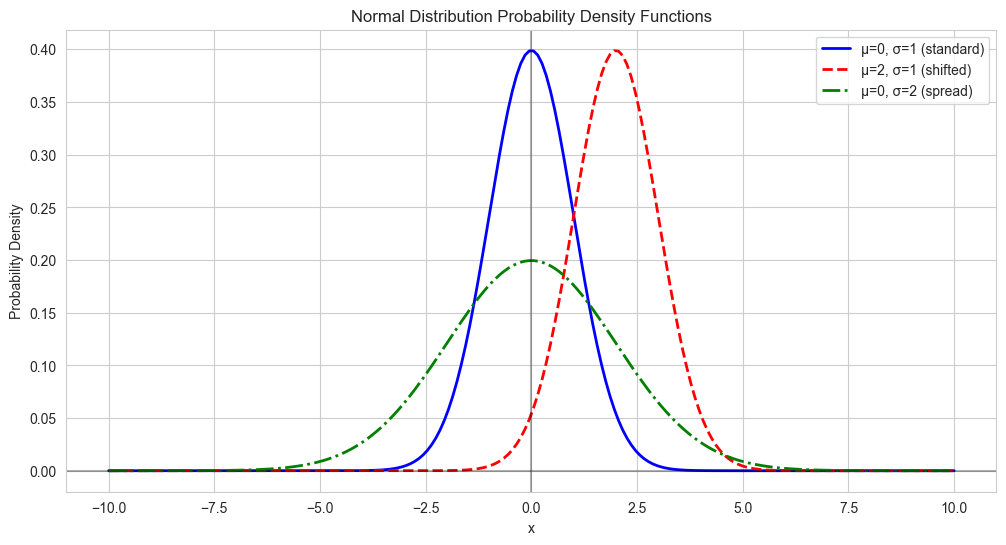

Probability density values for standard normal distribution:
At x=0: 0.3989
At x=1: 0.2420
At x=-1: 0.2420

Verification using scipy:
At x=0: 0.3989
At x=1: 0.2420
At x=-1: 0.2420


In [2]:
# Set seaborn style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Create data points
x = np.linspace(-10, 10, 200)

# Plot different normal distributions
distributions = [
    {'loc': 0, 'scale': 1, 'color': 'blue', 'style': '-', 'label': 'μ=0, σ=1 (standard)'},
    {'loc': 2, 'scale': 1, 'color': 'red', 'style': '--', 'label': 'μ=2, σ=1 (shifted)'},
    {'loc': 0, 'scale': 2, 'color': 'green', 'style': '-.', 'label': 'μ=0, σ=2 (spread)'}
]

for dist in distributions:
    plt.plot(x, norm.pdf(x, loc=dist['loc'], scale=dist['scale']), 
             color=dist['color'], linestyle=dist['style'], 
             lw=2, label=dist['label'])

# Customize the plot
plt.title('Normal Distribution Probability Density Functions', fontsize=12)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()

# Add reference lines
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Show the plot
plt.show()

def normal_pdf(x, mu=0, sigma=1):
    """
    Calculate the probability density for a normal distribution
    
    Parameters:
        x (float or array): Point(s) at which to evaluate the density
        mu (float): Mean of the distribution
        sigma (float): Standard deviation of the distribution
    
    Returns:
        float or array: Density value(s)
    """
    return (1/(sigma * np.sqrt(2*np.pi))) * np.exp(-(x-mu)**2 / (2*sigma**2))

# Example calculations
test_points = [0, 1, -1]
print("Probability density values for standard normal distribution:")
for x_test in test_points:
    prob_density = normal_pdf(x_test)
    print(f"At x={x_test}: {prob_density:.4f}")

# Compare with scipy implementation
print("\nVerification using scipy:")
for x_test in test_points:
    scipy_density = norm.pdf(x_test)
    print(f"At x={x_test}: {scipy_density:.4f}")

## 2. Fonction de répartition (CDF)

La CDF est l'intégrale de la PDF :

$$F(x) = \int_{-\infty}^x f(t)\,dt$$

Ce qui donne pour la loi normale :

$$F(x) = \int_{-\infty}^x \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(t-\mu)^2}{2\sigma^2}}\,dt$$

In [3]:
def normal_cdf(x, mu=0, sigma=1):
    """
    Cumulative distribution function for the normal distribution
    
    Parameters:
        x (float or array): The value(s) to evaluate the CDF at
        mu (float): Mean of the distribution
        sigma (float): Standard deviation of the distribution
    
    Returns:
        float or array: The probability that a normally-distributed random variable is <= x
    """
    return stats.norm.cdf(x, mu, sigma)

## 3. Inverse de la CDF (Quantile)

L'inverse de la CDF est définie comme :
- Pour une probabilité $p \in [0,1]$
- On cherche $x$ tel que $F(x) = p$
- On note cette fonction $F^{-1}(p)$

In [4]:
def normal_inverse_cdf(p, mu=0, sigma=1):
    """
    Inverse cumulative distribution function (quantile function) for the normal distribution
    
    Parameters:
        p (float or array): The probability value(s) (between 0 and 1)
        mu (float): Mean of the distribution
        sigma (float): Standard deviation of the distribution
        
    Returns:
        float or array: The value x where P(X ≤ x) = p for X following normal distribution
    """
    if np.any((p < 0) | (p > 1)):
        raise ValueError("Probability must be between 0 and 1")
    return stats.norm.ppf(p, mu, sigma)

In [5]:

def plot_normal_functions(mu=0, sigma=1):
    """
    Create plots of the normal CDF and its inverse
    
    Parameters:
        mu (float): Mean of the distribution
        sigma (float): Standard deviation of the distribution
    """
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Data for CDF plot
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
    y_cdf = normal_cdf(x, mu, sigma)
    
    # Data for inverse CDF plot
    p = np.linspace(0.001, 0.999, 1000)  # Avoid 0 and 1 due to infinity
    x_inv = normal_inverse_cdf(p, mu, sigma)
    
    # Plot CDF
    ax1.plot(x, y_cdf, 'b-', lw=2, label='CDF')
    ax1.grid(True, alpha=0.3)
    ax1.set_title('Normal CDF')
    ax1.set_xlabel('x')
    ax1.set_ylabel('P(X ≤ x)')
    ax1.legend()
    
    # Plot inverse CDF
    ax2.plot(p, x_inv, 'r-', lw=2, label='Inverse CDF')
    ax2.grid(True, alpha=0.3)
    ax2.set_title('Normal Inverse CDF (Quantile Function)')
    ax2.set_xlabel('p')
    ax2.set_ylabel('x where P(X ≤ x) = p')
    ax2.legend()
    
    # Add reference lines
    ax1.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
    ax1.axvline(x=mu, color='gray', linestyle='--', alpha=0.5)
    ax2.axhline(y=mu, color='gray', linestyle='--', alpha=0.5)
    ax2.axvline(x=0.5, color='gray', linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    return fig

## 4. Propriétés importantes

$$F^{-1}(F(x)) = x$$
$$F(F^{-1}(p)) = p$$
$$F^{-1}(0.5) = \mu \text{ (la médiane)}$$
$$F^{-1}(0.975) \approx \mu + 1.96\sigma \text{ (pour IC 95\%)}$$

## 5. Méthode d'approximation pour l'inverse

Pour $0.5 \leq p \leq 0.92$, on peut approximer $F^{-1}(p)$ par :

$$x \approx t - \frac{c_0 + c_1t + c_2t^2}{1 + d_1t + d_2t^2 + d_3t^3}$$

où $t = \sqrt{-2\ln(1-p)}$

## 6. Valeurs clés pour la loi normale standard ($\mu=0$, $\sigma=1$)

$$F^{-1}(0.975) \approx 1.96$$
$$F^{-1}(0.95) \approx 1.645$$
$$F^{-1}(0.90) \approx 1.28$$
$$F^{-1}(0.75) \approx 0.674$$
$$F^{-1}(0.50) = 0$$

## 7. Relations avec les intervalles de confiance

Pour un niveau de confiance $\alpha$, l'intervalle de confiance est :

$$[\mu - z_{1-\alpha/2}\sigma, \mu + z_{1-\alpha/2}\sigma]$$

où $z_{1-\alpha/2} = F^{-1}(1-\alpha/2)$

Par exemple, pour un IC à 95% :
$$\alpha = 0.05 \implies z_{0.975} = F^{-1}(0.975) \approx 1.96$$

In [ ]:
if __name__ == "__main__":
    # Set distribution parameters
    mu = 0
    sigma = 1
    
    # Create plots
    fig = plot_normal_functions(mu, sigma)
    
    # Calculate some example quantiles
    probabilities = [0.1, 0.25, 0.5, 0.75, 0.9]
    print("\nNormal distribution quantiles (μ=0, σ=1):")
    for p in probabilities:
        x = normal_inverse_cdf(p, mu, sigma)
        print(f"P(X ≤ {x:.4f}) = {p}")
    
    plt.show()


Normal distribution quantiles (μ=0, σ=1):
P(X ≤ -1.2816) = 0.1
P(X ≤ -0.6745) = 0.25
P(X ≤ 0.0000) = 0.5
P(X ≤ 0.6745) = 0.75
P(X ≤ 1.2816) = 0.9
